 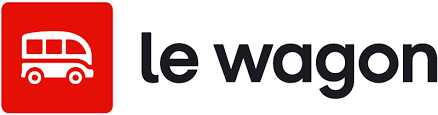

# Spotify clustering

In this challenge, we'll be using a dataset from Spotify that contains metadata for songs on the platform.

By metadata we mean info about the song such as name, artists, metrics about it's sound and other musical attributes.

We will use this dataset to try and cluster songs together that are closely related! This is the underlying theory behind how recommender algorithms work on sites such as Spotify, Netflix, etc.

## Data Exploration

Please run the cell below to return the spotify song data!

In [ ]:
import pandas as pd

spotify_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_spotify_data.csv')
spotify_df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


For the purposes of our analyses, we will only need the numeric features from our dataset. Select only these and save them in a variable called `spotify_numeric`

In [ ]:
# your code here
spotify_numeric=spotify_df.select_dtypes(include="number")
spotify_numeric


,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716
...,...,...,...,...,...,...,...,...,...,...
9995,72,0.786,0.608,0.808,0,7,0.0822,-3.702,0.0881,105.029
9996,68,0.717,0.734,0.753,0,7,0.1010,-6.020,0.0605,137.936
9997,76,0.634,0.637,0.858,0,4,0.2580,-2.226,0.0809,91.688
9998,70,0.671,0.195,0.623,1,2,0.6430,-7.161,0.3080,75.055


Have a read through your features and try to understand what they are related to!

Spotify generate their own features that relate to abstract characteristcs that can be attributed to a piece of music (e.g. 'valence' or 'danceability'), you don't need to worry about how these are calculated!

Then we also have some information that is more literal such as the 'key', 'tempo' and whether a song is 'explicit' or not.

Investiate the distributions of some of your variables below:

- What is the ratio of explicit vs non-explicit songs?
- How is popularity distributed?
- How are Spotify's internal song metrics distributed?

In [ ]:
# your code here
explicit_counts = spotify_numeric['explicit'].value_counts()
ratio_explicit = explicit_counts / explicit_counts.sum()
ratio_explicit

,count
explicit,
0,0.8968
1,0.1032


In [ ]:
# your code here
import plotly.express as px

print(spotify_numeric['popularity'].describe())
px.histogram(spotify_numeric, x='popularity')

count    10000.000000
mean        37.556800
std         12.559743
min          0.000000
25%         27.000000
50%         36.000000
75%         46.000000
max         86.000000
Name: popularity, dtype: float64


In [ ]:
# your code here
px.histogram(spotify_numeric, x='danceability')

In [ ]:
px.histogram(spotify_numeric, x='tempo')

In [ ]:
px.histogram(spotify_numeric, x='valence')

In [ ]:
px.histogram(spotify_numeric, x='energy')

The cell below will visualize three of your features in 3D space. Feel free to switch up the variables that are being used for the *x*, *y*, *z* axes.

Because we are using plotly express, you can use your cursor to move around / zoom in & out of the chart.

In [ ]:
import plotly.express as px

fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    opacity=0.7,
                    width=500,
                    height=500
           )
fig.show()

## First model

Our goal in this challenge is to cluster our songs into similar groups! The plot above may or may not reveal things that look like clusters, but remember! We can only visualise three of our variables here at a time.

When we train a clustering model it will cluster our songs in n-dimensional space, where n is the number of features being fed into the model.

Let's start by instantiating a simple KMeans model, with 8 clusters.

Fit this to your numeric spotify data and save the labels that your model has stored in a variable called `labels_simple`.

<details>
    <summary><i>Hint</i></summary>

To get the labels, have a look at the attributes your model has once it has been fitted to your data.
</details>

In [ ]:
# your code here
from sklearn.cluster import KMeans

model_simple = KMeans(n_clusters=8, random_state=42)
model_simple.fit(spotify_numeric)

labels_simple = model_simple.labels_


What is the distribution of our labels? How many songs do we have in each cluster?

In [ ]:
# your code here
px.histogram(labels_simple)

We can also now visualise our songs in 3D space again, but this time colour them by our new labels to see what clusters we have created! Run the cell below to see how it's looking.

In [ ]:
fig = px.scatter_3d(spotify_numeric,
                    x='danceability',
                    y='energy',
                    z='speechiness',
                    color=labels_simple,
                    width=500,
                    height=500)
fig.show()

It looks a little bit chaotic doesn't it... I'm not sure I'd be forking out the monthly suscription costs if my discover weekly was as all the place as this chart is.

Do you have any intuitions as to why our labels might look so poorly clustered?

<details>
    <summary><i>Answer</i></summary>

Remember that KMeans (and most unsupervised learning algorithms) are distance based. We have **not** scaled our numeric features yet. Perhaps doing this will make things look a bit clearer?
</details>

In the cell below, perform the preprocessing on our dataset that you deem necessary!

## Preprocessing

In [ ]:
# your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify_numeric_scaled = scaler.fit_transform(spotify_numeric)

## Modelling with preprocessed data

Now, let's train and fit a model in the same way that we did above. However, this time we will use the scaled data! Save the labels in a variable called `labels_scaled`

In [ ]:
# your code here
model_scaled = KMeans(n_clusters=8, random_state=42)
model_scaled.fit(spotify_numeric_scaled)

labels_scaled = model_scaled.labels_

Run the cell below to see how our clusters look in 3D space, but with our newly scaled data.

In [ ]:
spotify_numeric_scaled

array([[-1.23868599,  0.72151114,  0.13713053, ..., -0.54008366,
        -0.47802994, -0.08280853],
       [-0.99981566, -0.52506122, -1.01034856, ..., -0.16344843,
        -0.53177889,  0.78003549],
       [-1.31830943, -0.65421061,  1.18516142, ...,  0.00363177,
        -0.43423451, -1.18438958],
       ...,
       [ 3.06097997,  0.47444275,  0.43547509, ...,  1.42766626,
        -0.00523833, -0.94158767],
       [ 2.58323931,  0.68220481, -1.25514409, ...,  0.50017382,
         2.25520325, -1.4912711 ],
       [ 2.90173309,  1.72101511,  0.45459974, ...,  0.91984771,
         0.26450172, -0.83243092]])

In [ ]:
fig_scaled = px.scatter_3d(spotify_numeric,
                           x='tempo',
                           y='energy',
                           z='speechiness',
                           color=labels_scaled,
                           width=500,
                           height=500)
fig_scaled.show()

## Finding the right value for *K*

It should look a bit more tidy, maybe a bit more stratified! Progress!

**However, it still doesn't look perfect**. Remember though, we are only looking at 3 dimensions out of the 10 dimensions that our model is trained on.

It might be that, if we could visualise 10 dimensionsal space, we would see some much more intuitively shaped clusters!

So far we have been using 8 clusters for our models so far, but we havented tested whether this makes sense.

Let's use *the elbow method* to check how many of clusters we should ideally be using for this dataset. Do this below. Remember to use a plot to visualise your results.



In [ ]:
# your code here
inertias = []
n_k = range(1, 15)

# for each number of centroids
for k in n_k:


    model_scaled = KMeans(n_clusters=k, random_state=42)


    model_scaled.fit(spotify_numeric_scaled)


    inertias.append(model_scaled.inertia_)

In [ ]:
# your code here
inertias

[100000.00000000045,
 84786.52322930036,
 76700.47339434852,
 65411.91496250553,
 60270.17341873979,
 56592.41180579355,
 53917.26147089548,
 51312.25429465371,
 48584.27579258959,
 47039.14051601434,
 45560.339057121884,
 44219.842938056005,
 43041.21045063496,
 42461.74533596267]

In [ ]:
# your code here
fig = px.line(x=n_k, y=inertias, title="Elbow Method for Optimal k", markers=True)
fig.show()

## Creating a model with the ideal number of clusters

It looks as though have around 6 clusters makes sense with our dataset. Create a new KMeans model using 6 clusters and plot it in 3D space using the same process that we have done above.

In [ ]:
# your code here
model_scaled_6 = KMeans(n_clusters=6, random_state=42)
model_scaled_6.fit(spotify_numeric_scaled)

labels_scaled_6 = model_scaled_6.labels_

In [ ]:
fig_scaled = px.scatter_3d(spotify_numeric,
                           x='tempo',
                           y='energy',
                           z='speechiness',
                           color=labels_scaled_6,
                           width=500,
                           height=500)
fig_scaled.show()

The chart doesn't reveal a whole lot more, but perhaps we can create some theoretical playlists based on our clusters?

Add the new labels from our model that has 6 clusters to our original spotify dataframe as a column called 'label'.

In [ ]:
# your code here


## Generating Spotify playlists based on our clusters!

We should now see the original meta-data for our spotify songs, but **with the added label of which cluster they are located in** based on our KMeans algorithm

Let's generate 6 playlists (one for each cluster) that contains 15 random songs from that cluster.

Below we have created a dictionary called `daily_mixes`. Inside this dictionary we want to store keys that are the name of the cluster labels, and then as values we want dataframes that only contains the songs from that specific cluster.

Finish the for loop below to obtain this dictionary!

In [ ]:
spotify_df['labels'] = labels_scaled_6

In [ ]:
cluster = 0
playlist_0 = spotify_df.loc[spotify_df['labels'] == cluster].sample(15)
playlist_0 = playlist_0[['name','artists']]
playlist_0

,name,artists
1805,Chiquita,['Aerosmith']
4929,I Live My Life For You,['Firehouse']
5975,CLONE,['Gojira']
9396,Signal,['TWICE']
1079,Do You Want To Dance - Remastered 2010,['John Lennon']
1751,Autonomy - 2001 Remastered Version,['Buzzcocks']
4826,Empiezo a Recordarte,['Monica Naranjo']
3671,Sins of Omission,['Testament']
1075,Blue Mist,"[""Mama's Pride""]"
4189,So Many Millions,['Fishbone']


In [ ]:
daily_mixes = {}

for cluster in spotify_df['labels'].unique():
    print(cluster)
  # your code here

    playlist_0 = spotify_df.loc[spotify_df['labels'] == cluster].sample(15)
    playlist_0 = playlist_0[['name','artists']]
    playlist_0
    daily_mixes[cluster] = playlist_0

1
2
5
0
3
4


Run the cell below to print out our 6 playlists!!!

In [ ]:
for key,value in daily_mixes.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']])

--------------------------------------------------
Here are some songs for playlist 1
--------------------------------------------------


,name,artists
3484,Electricity,['Orchestral Manoeuvres In The Dark']
1474,Mean Old Frisco,['Eric Clapton']
4817,Gimme the Loot - 2005 Remaster,['The Notorious B.I.G.']
954,Williamson County,['Gary Stewart']
3602,I Really Love You Girl,['Bobby Brown']


--------------------------------------------------
Here are some songs for playlist 2
--------------------------------------------------


,name,artists
9283,We Don't Talk Anymore,['Dean Stance']
1114,A Couple More Years,['Waylon Jennings']
101,With Tomorrow,['Gene Clark']
6186,Cielo Rojo,['Miguel Aceves Mejia']
1388,Dance on a Volcano - Live in Paris,['Genesis']


--------------------------------------------------
Here are some songs for playlist 5
--------------------------------------------------


,name,artists
5577,El Teterete - Live Version,['Banda Maguey']
2841,真夜中すぎの恋,['Anzen Chitai']
1471,Son of a Poor Man - Live on U.S. Tour - 1976,['REO Speedwagon']
5273,Sweet Girl - Live at Warner Brothers Studios i...,['Fleetwood Mac']
8563,Your Glory / Nothing But The Blood - Live,['All Sons & Daughters']


--------------------------------------------------
Here are some songs for playlist 0
--------------------------------------------------


,name,artists
1207,Blitzkrieg Bop - Single Version,['Ramones']
748,You'd Better Believe It - Live at Edmonton Sun...,['Hawkwind']
2596,Fix Me,['Black Flag']
5650,BREAK IN2 THE NITE - DAve Rodgers Remix,['m.o.v.e']
5035,History - Remastered 2016,['The Verve']


--------------------------------------------------
Here are some songs for playlist 3
--------------------------------------------------


,name,artists
6838,TBC,['Ragazzi']
8041,El Primer Lugar,['La Original Banda El Limón de Salvador Lizár...
5801,Easy Tonight,['Five For Fighting']
5918,Jugando Al Amor,['Conjunto Primavera']
8981,Dummy!,['Toby Fox']


--------------------------------------------------
Here are some songs for playlist 4
--------------------------------------------------


,name,artists
9343,Ghost,['Upchurch']
4322,So What'Cha Want - Soul Assassin Remix Version,['Beastie Boys']
8325,Waves,['Electric Guest']
8286,Werkin' Girls,['Angel Haze']
9506,BLACKJACK,['Aminé']


### Running clustering with DBSCAN

As a bonus, let's try and run a clustering analysis using [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)!

Remember, with `DBSCAN` we don't need to *a-prior* select the number of clusters we will end up with.

Instantiate and fit a `DBSCAN` model. Read the documentation and be sure to trial out different values for `epsilon` and `min_samples` - **this is essential to return reasonable results!** [This article](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd) has some helpful tips on how to help pick reasonable values

In [ ]:
# your code here
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan_model = DBSCAN(eps=1.5, min_samples=5)
dbscan_model.fit(spotify_numeric_scaled)

DBSCAN(eps=1.5)

How many clusters has the model created? What is their distribution? Save your labels in a variable called `dbscan_labels`. Is this the same as what we came up with using the Elbow Method?

<Axes: ylabel='count'>

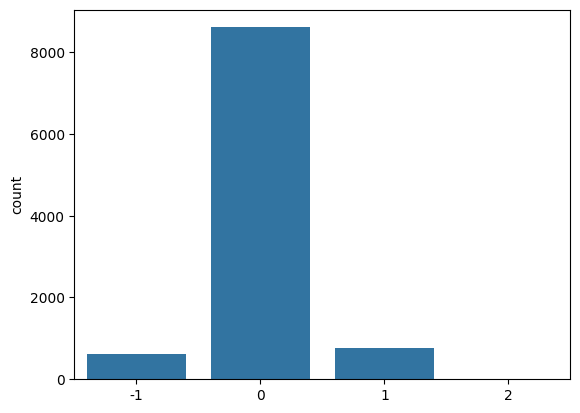

In [ ]:
# your code here
import seaborn as sns
dbscan_labels = dbscan_model.labels_
sns.countplot(x=dbscan_labels)


Run the cell below to plot your clusters using the DBSCAN labels.

In [ ]:
fig_dbscan = px.scatter_3d(spotify_scaled,
                           x='danceability',
                           y='energy',
                           z='speechiness',
                           color=dbscan_labels,
                           width=500,
                           height=500)
fig_dbscan.show()

NameError: name 'spotify_scaled' is not defined

Using your fitted model, add in your predicted cluster labels for each song to the spotify dataframe in a new column called 'label_dbscan'

<details>
    <summary><i>Hint</i></summary>

Your number of clusters will be very dependent on the parameters you specified when instantiaing your model!
</details>

In [ ]:
# your code here

The cell below will generate some new playlists using the DBSCAN clusters!

In [ ]:
daily_mixes_dbscan = {}

for num_cluster in np.unique(dbscan_labels):

  daily_mixes_dbscan[num_cluster] = spotify_df[spotify_df['label_dbscan'] == num_cluster]


for key,value in daily_mixes_dbscan.items():
  print("-" * 50)
  print(f"Here are some songs for playlist {key}")
  print("-" * 50)
  display(value.sample(5)[['name', 'artists']])

You've just completed your first unsupervised clustering! **Congrats**! This is a *very* commonplace methodology, especially in recommender systems.

By no means is the example we have gone through meant to be perfect (especially with a subjective topic such as music + limited features), and it can churn out some pretty chaotic results, but **the principles will very much hold true for all clustering tasks**.

Importantly, *never forgot to scale your data if you are using a distance-based algorithm*!

Finally, here are some links to more information about Spotify data / the Spotify API (perhaps some project inspiration)

- [Audio Analysis theory with the Spotify Web API](https://www.youtube.com/watch?v=goUzHd7cTuA)
- Spotify API [docs](https://developer.spotify.com/documentation/web-api/)
- Spotify API Wrappers [Tekore](https://github.com/felix-hilden/tekore) and [Spotipy](https://github.com/plamere/spotipy)